<a href="https://colab.research.google.com/github/DAGGUBILLISURESH/Spark-foundation-tasks/blob/main/TASK_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author : Suresh Daggubilli
# Task 6 : Prediction using decision tree algorithm
# GRIP @ The Sparks Foundation
# New Section
# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.metrics as sm

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv('/content/Iris.csv',index_col=0)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Input data visualization
 

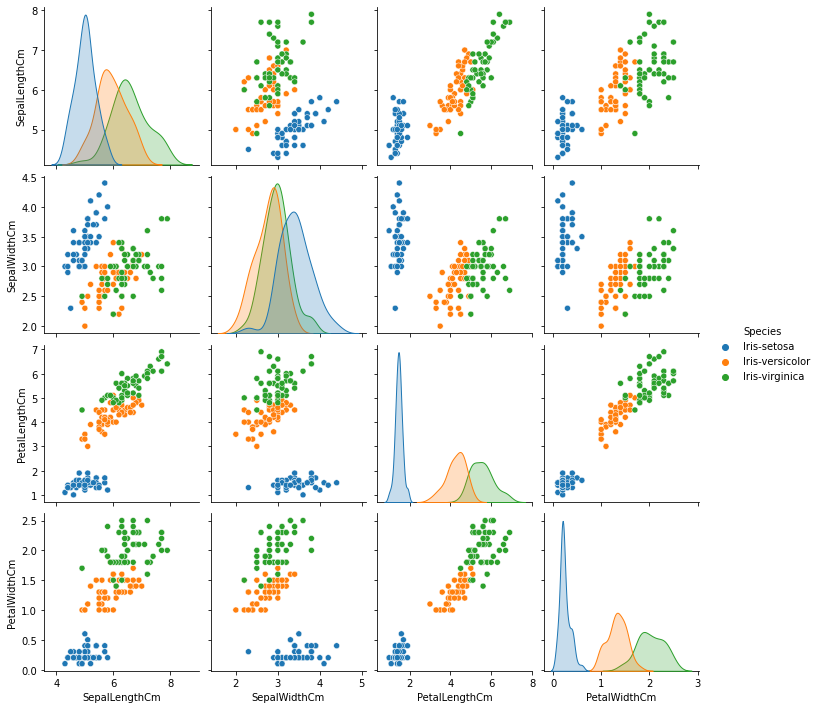

In [6]:
sns.pairplot(data, hue='Species')

# Finding correlation matrix

In [7]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


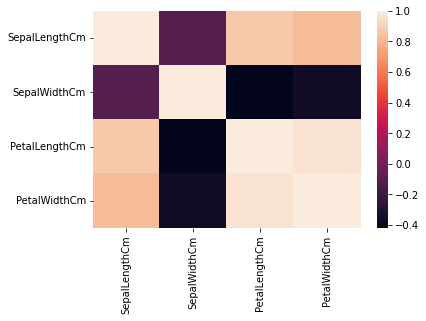

In [8]:
sns.heatmap(data.corr())

# Data Pre-processing

In [9]:
target=data['Species']
df=data.copy()
df=df.drop('Species', axis=1)
df.shape

(150, 4)

In [10]:
x = data.iloc[:,[0,1,2,3]].values
le=LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])
y = data['Species'].values
data.shape

(150, 5)

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("Training split:",x_train.shape)
print("Testing spllit:",x_test.shape)

Training split: (120, 4)
Testing spllit: (30, 4)


# Decision Tree

In [12]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

# Classification Report and Confusion Matrix

In [13]:
y_pred=tree.predict(x_test)
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Accuracy

In [14]:
print("Accuracy:",sm.accuracy_score(y_test,y_pred))

Accuracy: 1.0


# confusion matrix

In [15]:
ac=confusion_matrix(y_test,y_pred)
ac

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

# Visualization of trained model

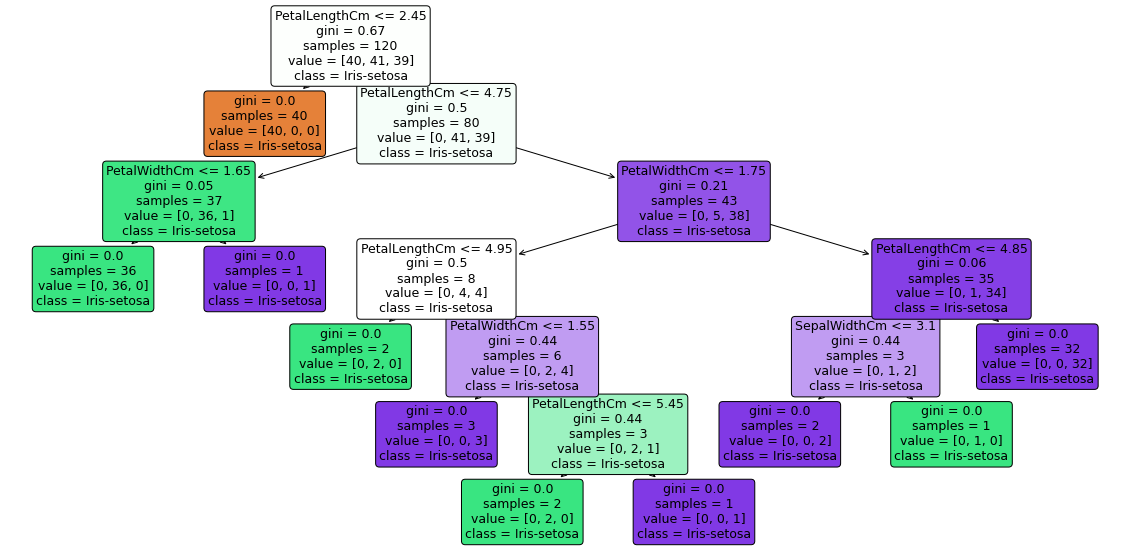

In [16]:
#visualizing the graph
plt.figure(figsize=(20,10))
tree1=plot_tree(tree,feature_names=df.columns,precision=2,rounded=True,filled=True,class_names=target.values)

# The Descision Tree Classifier is created and is visaulized graphically. Also the prediction is calculated using decision tree algorithm and accuracy of the model is evaluated.